# CHAPTER3 신경망

- 퍼셉트론에서 신경망으로
- 활성화 함수
- 신경망 구현하기
- 출력층 설계하기
- 정리

### 3.1 퍼셉트론에서 신경망으로

- 퍼셉트론은 가중치를 설정하는 작업을 사람이 수동해야 하는 한계점이 있습니다.


- 신경망은 이러한 퍼셉트론의 한계점을 해결해줍니다.

#### 3.1.1 신경망의 예

<img src = 'img/005.png' width = 200>

- 신경망은 크게 입력층, 은닉층, 출력층으로 나뉘어 있습니다.


- 은닉층의 뉴런은 사람 눈에는 보이지 않습니다.

#### 3.1.2 퍼셉트론 활용

<img src = 'img/006.png' width = 160>

---

- $b$(bias)를 활용한 수식

$$y=
\begin{cases}
0& (b+w_1x_1+w_2x_2 \le 0) \\
1& (b+w_1x_1+w_2x_2 \gt 0)
\end{cases}$$

- 퍼셉트론의 $\theta$를 b로 변환해 하나의 뉴런으로 생성합니다.


- 생성된 뉴런을 식에 적용합니다.

### 3.2 활성화 함수

$$y = h(b+w_1x_1+w_2x_2)$$

$$h(x)=
\begin{cases}
0& (x \le 0) \\
1& (x \gt 0)
\end{cases}$$

<img src = 'img/007.png' width = 170>

- $h(x)$와 같이 입력신호의 총합을 출력신호로 변환해주는 함수를 의미합니다.


- $h(x)$의 경우 입력이 0을 넘으면 1을 돌려주고 그렇지 않으면 0을 돌려줍니다.


- 활성화 함수는 비선형 함수를 사용해야 합니다.


- 비선형 함수란 말그대로 선형 함수가 아닌 함수를 말합니다. (Not 직선)


- 선형함수는 층을 깊게해도 선형에만 머물러있기 때문입니다. ($h(x) = cx$, $h(h(h(x))) = c^3x$) 

#### 3.2.1 시그모이드 함수 (Sigmoid Function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# make sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# test
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

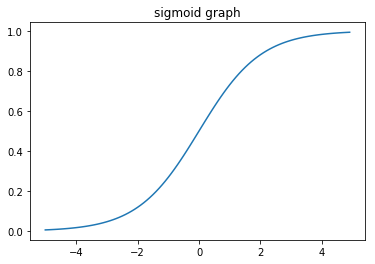

In [2]:
# make graph
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.title('sigmoid graph')
plt.show()

$$h(x) = \dfrac{1}{1+exp(-x)}$$

- $exp$는 자연상수로 2.7182..의 값을 갖는 실수 입니다.


- $y$값이 0~1사이의 값을 가지며 S자 모양을 하고 있어 이름이 붙여졌습니다.

#### 3.2.2 계단 함수 (Step Function)

In [3]:
def step_function(x): 
    
    # y is bool
    y = x > 0 
    
    # bool to int
    return y.astype(np.int) 

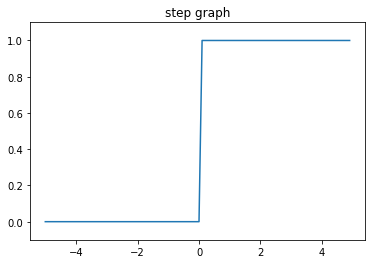

In [4]:
# make graph
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.title('step graph')
plt.ylim(-0.1, 1.1)
plt.show() 

- 임계값을 경계로 출력이 바뀌는 함수를 계단함수라 합니다.


- 퍼셉트론에서는 활성화 함수로 계딴함수를 이용한다고 할 수 있습니다.

#### ※ 시그모이드 함수 vs 계단 함수

#### 1) 공통점


- 입력이 작을 때 출력은 0에 가깝고 입력이 커지면 출력이 1에 가까워집니다.


- 입력값은 0에서 1사이입니다.


- 비선형 함수입니다.

#### 2) 차이점


- 시그모이드가 더 매끄럽습니다. (신경망에서 매우 중요한 역할)


- 시그모이드에선 연속적인 실수가 흐릅니다. (계단은 0, 1)

#### 3.2.3 ReLU 함수 (Rectified Linear Unit Function)

In [5]:
def ReLU(x):
    return np.maximum(0, x)

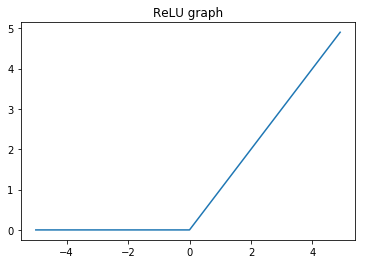

In [6]:
# make graph
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.title('ReLU graph')
plt.show()

$$h(x)=
\begin{cases}
0& (x \le 0) \\
x& (x \gt 0)
\end{cases}$$

- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하면 0을 출력하는 함수입니다.


- 최근 신경망 분야에서 시그모이드 함수보다 ReLU 함수를 많이 사용합니다.

### 3.3 신경망 구현하기

#### 3.3.1 표기법 

<img src = 'img/011.png' width = 200>

- $W_{12}^{(1)}$ 에서 앞에 1은 다음 층의 1번째 뉴런, 2는 앞층의 2번째 뉴런, (1)은 1층의 가중치를 의미합니다.

#### 3.3.2 각 층의 신호 전달

<img src = 'img/013.png' width = 300>

$$a_{1}^{(1)}\;=\;w_{11}^{(1)}x_1\; +\; w_{12}^{(1)}x_2\; + \;b_{1}^{(1)}$$

In [7]:
# 1단계
x = np.array([1.0, 0.5]) # 1 x 2 벡터
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2 x 3 매트릭스
B1 = np.array([0.1, 0.2, 0.3]) # 1 x 3 벡터

# a1
A1 = np.dot(x, W1) + B1
print(A1)

# z1
Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


<img src = 'img/014.png' width = 300>

In [8]:
# 2단계
W2 = np.array([ [0.1, 0.4], [0.2, 0.5], [0.3, 0.6] ])
B2 = np.array([0.1, 0.2])

# a2
A2 = np.dot(Z1, W2) + B2
print(A2)

# z2
Z2 = sigmoid(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### 3.4 출력층 설계

- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정합니다.


|문제|함수|
|--|--|
|회귀문제|항등 함수|
|2클래스|시그모이드 함수|
|다중클래스|소프트맥스 함수|

#### 3.4.1 소프트맥스 함수 (Softmax Function)

$$y_k = \dfrac{exp(a_k)}{\sum exp(a_i)}$$

In [9]:
# make softmax
def softmax(a):
    
    exp_a = np.exp(a - np.max(a))
    sum_exp_a = np.sum(exp_a)
    
    return exp_a / sum_exp_a

- 분모는 모든 입력 신호 지수함수의 합을 의미합니다.


- 분자는 입력신호 $a_k$의 지수함수를 의미합니다.


- 소프트맥스 함수의 출력은 0 ~ 1 사이의 실수입니다.


- 소프트맥스 함수의 총합은 1입니다.

In [10]:
a = np.array([0.3, 2.9, 4.0])

# make exp(a)
exp_a = np.exp(a)
print('exp_a :', exp_a)

# sum exp(a)
sum_exp_a = np.sum(exp_a)
print('sum_exp_a :', sum_exp_a)

# make y
y = exp_a / sum_exp_a

print('y :', y)

exp_a : [ 1.34985881 18.17414537 54.59815003]
sum_exp_a : 74.1221542101633
y : [0.01821127 0.24519181 0.73659691]


#### ※ 주의점

- 소프트맥스 함수의 문제점은 오버플로 문제가 생길 수 있다는 점입니다.


- 예를 들어 $exp(100)$은 0이 40개가 넘는 큰 값이 되고 따라서 수식을 안정화시킬 필요성이 있습니다.

$$y_k = \dfrac{exp(a_k)}{\sum exp(a_i)} = \dfrac{Cexp(a_k)}{C\sum exp(a_i)} = \dfrac{exp(a_k + logC)}{\sum exp(a_i + logC)} = \dfrac{exp(a_k + C')}{\sum exp(a_i + C')}$$

- 똑같은 상수를 곱하고 exp에 넣어준다. $logC = C'$로 치환합니다.


- 일반적으로 $C'$는 입력신호 중 최대값에 (-)를 붙입니다.


- 이 값을 빼서 전체적으로 값을 낮추는 역할을 합니다.

#### 3.4.2 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 문제에 맞게 적절히 정합니다.


- 분류에선 분류하고 싶은 클래스 수로 설정하는 것이 일반적입니다.

---

### 3.5 정리

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용합니다.


- Numpy 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있습니다.


- Machine Learning은 크게 regression과 classification로 나눌 수 있습니다.


- 출력층의 활성화 함수로는 regression은 주로 항등 함수를, classification에서는 소프트맥스 함수를 이용합니다.


- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정합니다.


- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있습니다.